In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from citipy import citipy

from datetime import datetime 
import requests

# Import the API key.
from config import weather_api_key 
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities) 

609

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=faa17ee34af43750a28b2203d8d446e3


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1 

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i] 

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Indicate that Data Loading is complete.

Processing Record 1 of Set 13 | nuuk
Processing Record 2 of Set 13 | albany
Processing Record 3 of Set 13 | avarua
Processing Record 4 of Set 13 | torbay
Processing Record 5 of Set 13 | nguiu
City not found. Skipping...
Processing Record 6 of Set 13 | ushuaia
Processing Record 7 of Set 13 | sitka
Processing Record 8 of Set 13 | cabo san lucas
Processing Record 9 of Set 13 | mahebourg
Processing Record 10 of Set 13 | portland
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | bengkulu
Processing Record 13 of Set 13 | roald
Processing Record 14 of Set 13 | butaritari
Processing Record 15 of Set 13 | vanavara
Processing Record 16 of Set 13 | hilo
Processing Record 17 of Set 13 | hermanus
Processing Record 18 of Set 13 | santa rosa
Processing Record 19 of Set 13 | lata
Processing Record 20 of Set 13 | ribeira grande
Processing Record 21 of Set 13 | phan rang
City not found. Skipping...
Processing Record 22 of Set 13 | severo-kurilsk
Processing Record 23 of Set 13 | a

Processing Record 33 of Set 16 | nhulunbuy
Processing Record 34 of Set 16 | sibolga
Processing Record 35 of Set 16 | thompson
Processing Record 36 of Set 16 | ponta do sol
Processing Record 37 of Set 16 | sahaspur
Processing Record 38 of Set 16 | hokitika
Processing Record 39 of Set 16 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 16 | naze
Processing Record 41 of Set 16 | hualmay
Processing Record 42 of Set 16 | milan
Processing Record 43 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 16 | margate
Processing Record 45 of Set 16 | shimoda
Processing Record 46 of Set 16 | akdepe
Processing Record 47 of Set 16 | ibra
Processing Record 48 of Set 16 | coahuayana
Processing Record 49 of Set 16 | mar del plata
Processing Record 50 of Set 16 | saint george
Processing Record 1 of Set 17 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 17 | maragogi
Processing Record 3 of Set 17 | lagoa
Processing Record 4 of Set 17

Processing Record 17 of Set 20 | alofi
Processing Record 18 of Set 20 | airai
Processing Record 19 of Set 20 | geraldton
Processing Record 20 of Set 20 | jonesboro
Processing Record 21 of Set 20 | kangaatsiaq
Processing Record 22 of Set 20 | caledon
Processing Record 23 of Set 20 | comodoro rivadavia
Processing Record 24 of Set 20 | trabzon
Processing Record 25 of Set 20 | riohacha
Processing Record 26 of Set 20 | inderborskiy
City not found. Skipping...
Processing Record 27 of Set 20 | noumea
Processing Record 28 of Set 20 | kavieng
Processing Record 29 of Set 20 | myitkyina
Processing Record 30 of Set 20 | ballina
Processing Record 31 of Set 20 | nortelandia
Processing Record 32 of Set 20 | mrirt
City not found. Skipping...
Processing Record 33 of Set 20 | adrar
Processing Record 34 of Set 20 | taywarah
Processing Record 35 of Set 20 | riyadh
Processing Record 36 of Set 20 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 20 | marcona
City not found. Skipping...
P

Processing Record 3 of Set 24 | gari
Processing Record 4 of Set 24 | praia da vitoria
Processing Record 5 of Set 24 | vestmannaeyjar
Processing Record 6 of Set 24 | umm kaddadah
Processing Record 7 of Set 24 | muros
Processing Record 8 of Set 24 | evensk
Processing Record 9 of Set 24 | bataipora
Processing Record 10 of Set 24 | la ronge
Processing Record 11 of Set 24 | yining
Processing Record 12 of Set 24 | veraval
Processing Record 13 of Set 24 | meulaboh
Processing Record 14 of Set 24 | mitu
Processing Record 15 of Set 24 | shirpur
Processing Record 16 of Set 24 | hanna
Processing Record 17 of Set 24 | hovd
Processing Record 18 of Set 24 | koubia
Processing Record 19 of Set 24 | kerki
City not found. Skipping...
Processing Record 20 of Set 24 | garowe
Processing Record 21 of Set 24 | mathathane
Processing Record 22 of Set 24 | karratha
Processing Record 23 of Set 24 | mitsamiouli
Processing Record 24 of Set 24 | sidlaghatta
Processing Record 25 of Set 24 | wad madani
Processing Reco

In [9]:
city_data

[{'City': 'Nuuk',
  'Lat': 64.1835,
  'Lng': -51.7216,
  'Max Temp': 38.01,
  'Humidity': 65,
  'Cloudiness': 1,
  'Wind Speed': 14.97,
  'Country': 'GL',
  'Date': '2021-10-16 16:34:45'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 74.37,
  'Humidity': 75,
  'Cloudiness': 100,
  'Wind Speed': 5.01,
  'Country': 'US',
  'Date': '2021-10-16 16:30:01'},
 {'City': 'Avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 75.25,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'CK',
  'Date': '2021-10-16 16:31:43'},
 {'City': 'Torbay',
  'Lat': 47.6666,
  'Lng': -52.7314,
  'Max Temp': 48.27,
  'Humidity': 96,
  'Cloudiness': 90,
  'Wind Speed': 26.46,
  'Country': 'CA',
  'Date': '2021-10-16 16:31:12'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 31.62,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 25.32,
  'Country': 'AR',
  'Date': '2021-10-16 16:30:53'},
 {'City': 'Sitka',
  'Lat': 57.0531,
  'Lng': -

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10) 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuuk,64.1835,-51.7216,38.01,65,1,14.97,GL,2021-10-16 16:34:45
1,Albany,42.6001,-73.9662,74.37,75,100,5.01,US,2021-10-16 16:30:01
2,Avarua,-21.2078,-159.7750,75.25,88,75,6.91,CK,2021-10-16 16:31:43
3,Torbay,47.6666,-52.7314,48.27,96,90,26.46,CA,2021-10-16 16:31:12
4,Ushuaia,-54.8000,-68.3000,31.62,93,75,25.32,AR,2021-10-16 16:30:53
5,Sitka,57.0531,-135.3300,37.29,87,40,0.00,US,2021-10-16 16:31:49
6,Cabo San Lucas,22.8909,-109.9124,85.51,70,20,0.00,MX,2021-10-16 16:30:44
7,Mahebourg,-20.4081,57.7000,74.25,73,75,14.97,MU,2021-10-16 16:30:10
8,Portland,45.5234,-122.6762,55.17,91,40,1.01,US,2021-10-16 16:32:29
9,Rikitea,-23.1203,-134.9692,74.77,78,12,9.13,PF,2021-10-16 16:30:41


In [11]:
new_column_order = ["City" ,"Country" ,"Date" , "Lat" ,"Lng" , "Max Temp","Humidity","Cloudiness" ,"Wind Speed"]
df = city_data_df[new_column_order] 
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuuk,GL,2021-10-16 16:34:45,64.1835,-51.7216,38.01,65,1,14.97
1,Albany,US,2021-10-16 16:30:01,42.6001,-73.9662,74.37,75,100,5.01
2,Avarua,CK,2021-10-16 16:31:43,-21.2078,-159.7750,75.25,88,75,6.91
3,Torbay,CA,2021-10-16 16:31:12,47.6666,-52.7314,48.27,96,90,26.46
4,Ushuaia,AR,2021-10-16 16:30:53,-54.8000,-68.3000,31.62,93,75,25.32
...,...,...,...,...,...,...,...,...,...
548,Belaya Gora,RU,2021-10-16 16:30:57,68.5333,146.4167,6.76,96,84,5.03
549,Ancud,CL,2021-10-16 16:32:06,-41.8697,-73.8203,57.42,75,100,11.63
550,Kruisfontein,ZA,2021-10-16 16:33:18,-34.0033,24.7314,53.89,67,47,23.29
551,Sawakin,SD,2021-10-16 16:37:12,19.1059,37.3321,86.05,62,2,7.70


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") 

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

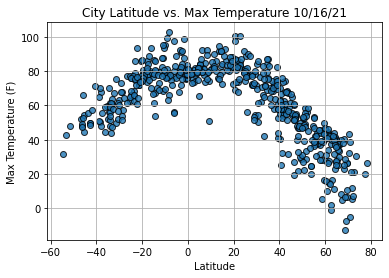

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

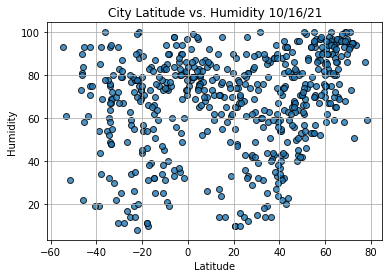

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

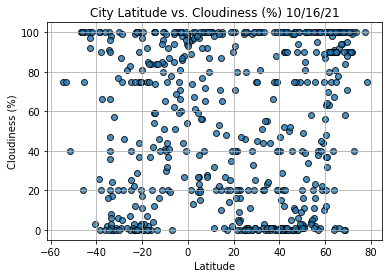

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show() 

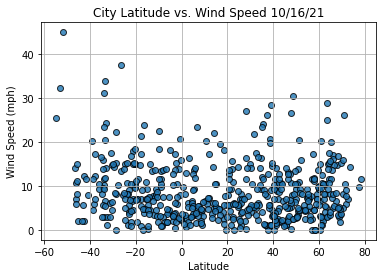

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show() 

In [21]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
print(f"The p-value is: {r_value:.3f}") 

The p-value is: -0.554


In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [24]:
index13 = city_data_df.loc[13] 
index13

City                     Vanavara
Lat                         60.34
Lng                      102.2797
Max Temp                    27.45
Humidity                       92
Cloudiness                     37
Wind Speed                   6.55
Country                        RU
Date          2021-10-16 16:30:41
Name: 13, dtype: object

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)] 

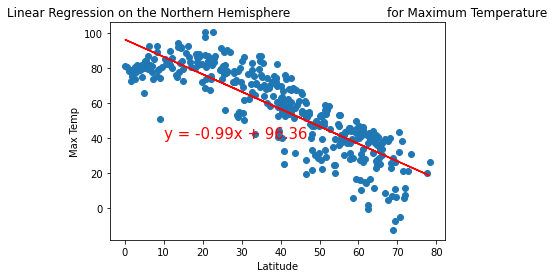

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40)) 

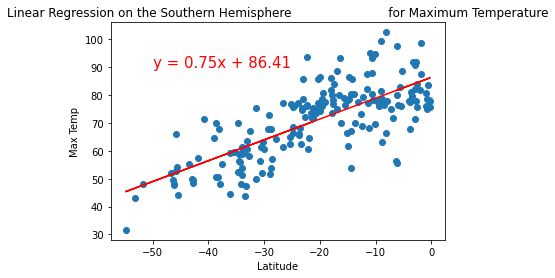

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90)) 

In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(f"The p-value is: {r_value:.3f}") 

The p-value is: 0.750


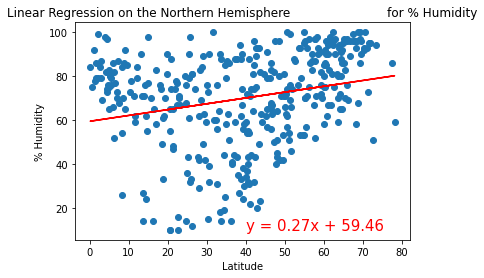

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10)) 

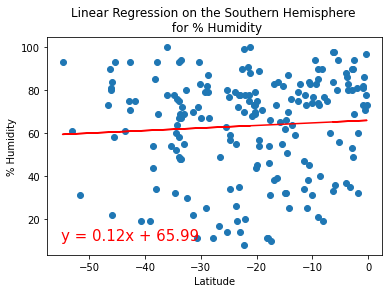

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,10)) 

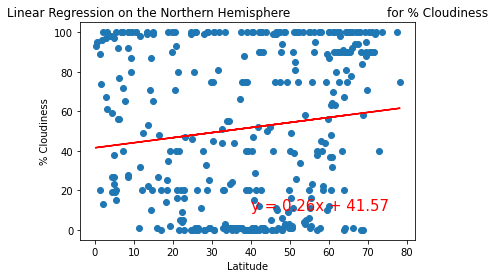

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10)) 

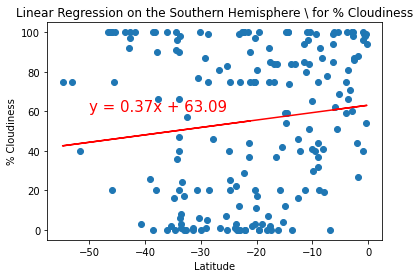

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60)) 

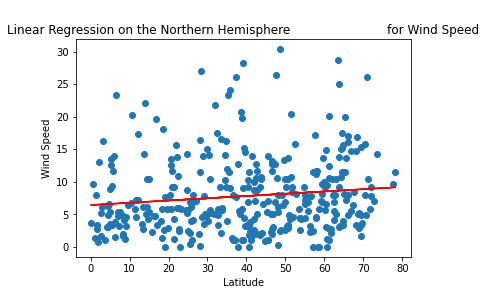

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

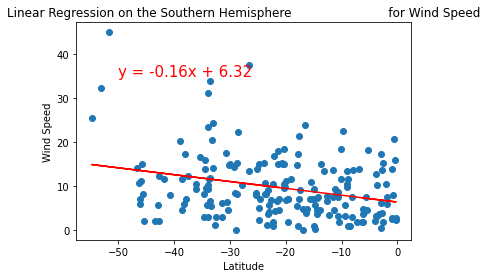

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))